In [1]:
import sys
sys.path.append("..")
from openeo_utils.utils import *

In [2]:
connection = get_connection()

temporal_extent = ["2023-09-01", "2023-10-01"]  # open ended interval

SMA_dc = connection.load_stac(
    # Path on backend server. Acces by loging into a free Terrascope VM:
    url="/data/users/Public/emile.sonneveld/ANIN/SMA_openeo_cropped_v03/stac/v0.2/collection.json",
    temporal_extent=temporal_extent,
    spatial_extent=spatial_extent_south_africa,
    bands=["SMA_openeo_cropped"],
)
SMA_dc = SMA_dc.filter_temporal(temporal_extent)
SMA_dc = SMA_dc.aggregate_temporal_period("month", reducer="mean")
SMA_dc = SMA_dc.rename_labels("bands", ["SMA"])

#geojson = load_south_africa_geojson()
geojson = load_johannesburg_geojson()
SMA_dc = SMA_dc.filter_spatial(geojson)


Authenticated using refresh token.
https://openeocloud.vito.be/openeo/1.0.0/ time: 2024-04-18 09:45:50.017001


In [3]:
output_path = Path(os.getcwd()) / "out-SMA.nc"
SMA_dc.download(output_path)

In [4]:
import xarray as xr

ds = xr.open_dataset(output_path)
ds

<xarray.Dataset>
Dimensions:  (t: 1, x: 1008, y: 336)
Coordinates:
  * t        (t) datetime64[ns] 2023-09-01
  * x        (x) float64 27.0 27.0 27.01 27.01 27.01 ... 29.99 29.99 30.0 30.0
  * y        (y) float64 -26.0 -26.0 -26.01 -26.01 ... -26.99 -26.99 -27.0 -27.0
Data variables:
    crs      |S1 ...
    SMA      (t, y, x) float32 ...
Attributes:
    Conventions:  CF-1.9
    institution:  openEO platform

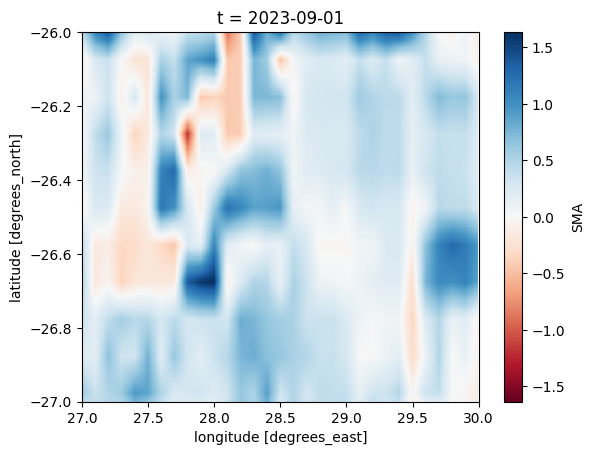

In [5]:
import matplotlib.pyplot as plt
var = ds["SMA"]

var.plot(cmap="RdBu")  # Use a colormap that suits your data
plt.show()

ds.close()